In [2]:
from astropy.io.fits import getdata
import glob
from matplotlib import pyplot as plt
import os
from astropy.table import Table
import corner
import pandas as pd
from astropy import units as u
from scipy import optimize

import numpy as np

fpma_gain_shift = {
                'det0':0.9933,
                'det1':0.9915,
                'det2':0.9991,
                'det3':0.9972
                }

fpmb_gain_shift = {
                'det0':0.9957,
                'det1':0.9932,
                'det2':0.9928,
                'det3':0.9603
                }

gain_met = 159663600. # from CALDB file
launch_met=77241600. # 2012-06-13T00:00:00

gain_date = ((gain_met - launch_met)*u.s).to(u.yr).value
epochs_per_yr = 2.

new_gain_change =9.
gain_time = [0, gain_date*epochs_per_yr, new_gain_change]

line_energy = 105.3
new_gain_met = ((new_gain_change / epochs_per_yr)*u.yr).to(u.s) + launch_met*u.s
print(new_gain_met)

219250800.0 s


In [4]:
def piecewise_linear(t, shift1, change2, shift2, en0 = 105.3):

    change1 = gain_date*epochs_per_yr


    dt1 = change1    
    dt2 = np.max(t) - change2
   
    f1 = lambda t: en0 * ( 1 - (1.0 - shift1) * t / dt1)
    f2 = lambda t: en0 * shift1
    f3 = lambda t: (en0 * shift1) * (1.0 - (1.0 - shift2) * (t - change2) / dt2)

    fx = np.select( [t < change1, (t>=change1) & (t<change2), t>=change2], [f1(t), f2(t), f3(t)])

    return fx
    



First guess:  [0.9933, 7.0, 0.997]
Fit:  [0.9933     8.99999999 0.99594454]


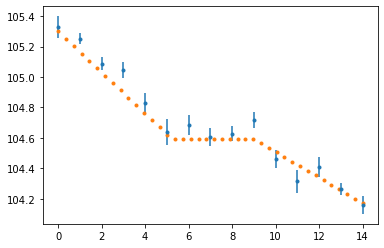

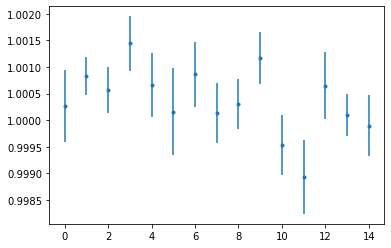

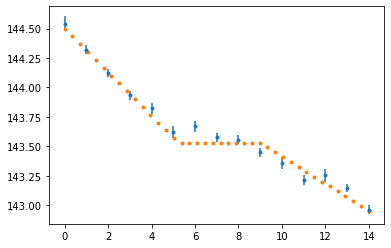

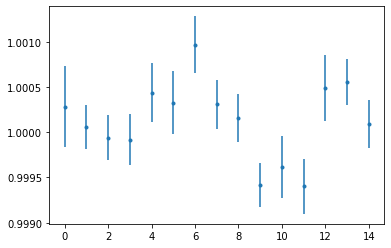

In [10]:
chain_files = sorted(glob.glob('epoch*det0*FPMA*chain.fits'))

epochs = []
line_cent = []
line_err = []
for file in chain_files:
    epoch_str = (file.split('_'))[0]
    epoch = float((epoch_str[5:]))
    
    epochs.append(epoch)
    
    chain = Table.read(file)

    df = chain.to_pandas()
    for entry in df:
        if 'LineE__1' != entry:
            continue


        q = corner.quantile(df[entry], [0.16, 0.5, 0.84])
        err = 0.5* ((q[1] - q[0]) + (q[2] - q[1]))
        
        line_cent.append(float(q[0]))
        line_err.append(float(err))

epochs = np.array(epochs)
td = np.linspace(0, np.max(epochs), 40)
p0 = [fpma_gain_shift['det0'], 7.0, 0.997]

plt.errorbar(epochs, line_cent, line_err, fmt='.')
#plt.plot(td, piecewise_linear(td, *p0 ), '.')

p , e = optimize.curve_fit(piecewise_linear, epochs, line_cent, sigma=line_err, p0 = p0,
                          bounds = ([p0[0]*0.9999, 5, 0.9],[p0[0], 10, 1.1]))

print('First guess: ', p0)
print('Fit: ', p)

plt.plot(td, piecewise_linear(td, *p), '.')

plt.show()

est_lines = piecewise_linear(epochs, *p)

plt.errorbar(epochs, line_cent / est_lines, line_err / est_lines, fmt = '.')


plt.show()



line_cent = []
line_err = []
for file in chain_files:
    
    chain = Table.read(file)
    df = chain.to_pandas()
    for entry in df:
        if 'LineE__4' != entry:
            continue


        q = corner.quantile(df[entry], [0.16, 0.5, 0.84])
        err = 0.5* ((q[1] - q[0]) + (q[2] - q[1]))
        
        line_cent.append(float(q[0]))
        line_err.append(float(err))


plt.errorbar(epochs, line_cent, line_err, fmt='.')
plt.plot(td, piecewise_linear(td, *p, en0=144.5 ), '.')




plt.show()

est_lines = piecewise_linear(epochs, *p, en0=144.5)

plt.errorbar(epochs, line_cent / est_lines, line_err / est_lines, fmt = '.')

plt.show()

First guess:  [0.9915, 7.0, 0.997]
Fit:  [0.9915     8.17883614 0.99526894]


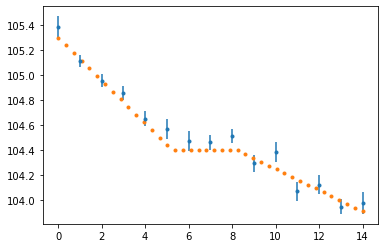

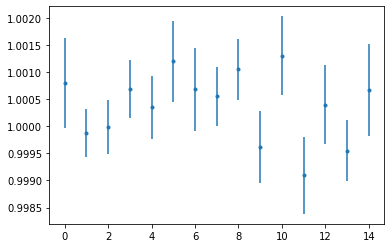

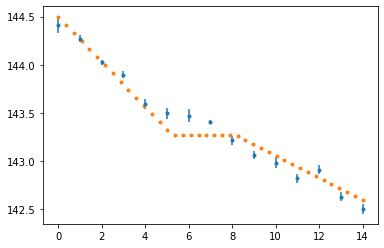

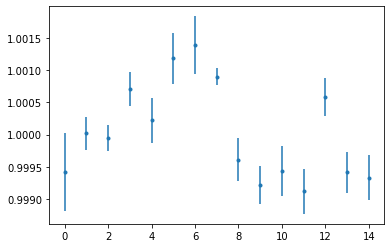

In [11]:
chain_files = sorted(glob.glob('epoch*det1*FPMA*chain.fits'))

epochs = []
line_cent = []
line_err = []
for file in chain_files:
    epoch_str = (file.split('_'))[0]
    epoch = float((epoch_str[5:]))
    
    epochs.append(epoch)
    
    chain = Table.read(file)

    df = chain.to_pandas()
    for entry in df:
        if 'LineE__1' != entry:
            continue


        q = corner.quantile(df[entry], [0.16, 0.5, 0.84])
        err = 0.5* ((q[1] - q[0]) + (q[2] - q[1]))
        
        line_cent.append(float(q[0]))
        line_err.append(float(err))

epochs = np.array(epochs)
td = np.linspace(0, np.max(epochs), 40)
p0 = [fpma_gain_shift['det1'], 7.0, 0.997]

plt.errorbar(epochs, line_cent, line_err, fmt='.')
#plt.plot(td, piecewise_linear(td, *p0 ), '.')

p , e = optimize.curve_fit(piecewise_linear, epochs, line_cent, sigma=line_err, p0 = p0,
                          bounds = ([p0[0]*0.9999, 5, 0.9],[p0[0], 10, 1.1]))

print('First guess: ', p0)
print('Fit: ', p)

plt.plot(td, piecewise_linear(td, *p), '.')

plt.show()

est_lines = piecewise_linear(epochs, *p)

plt.errorbar(epochs, line_cent / est_lines, line_err / est_lines, fmt = '.')


plt.show()



line_cent = []
line_err = []
for file in chain_files:
    
    chain = Table.read(file)
    df = chain.to_pandas()
    for entry in df:
        if 'LineE__4' != entry:
            continue


        q = corner.quantile(df[entry], [0.16, 0.5, 0.84])
        err = 0.5* ((q[1] - q[0]) + (q[2] - q[1]))
        
        line_cent.append(float(q[0]))
        line_err.append(float(err))


plt.errorbar(epochs, line_cent, line_err, fmt='.')
plt.plot(td, piecewise_linear(td, *p, en0=144.5 ), '.')




plt.show()

est_lines = piecewise_linear(epochs, *p, en0=144.5)

plt.errorbar(epochs, line_cent / est_lines, line_err / est_lines, fmt = '.')

plt.show()

First guess:  [0.9991, 7.0, 0.997]
Fit:  [0.9991     7.78946032 0.99481966]


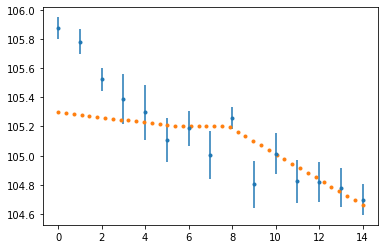

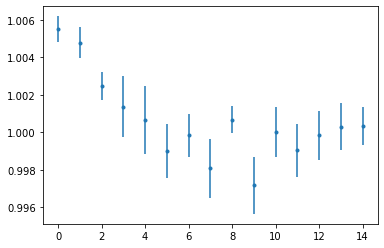

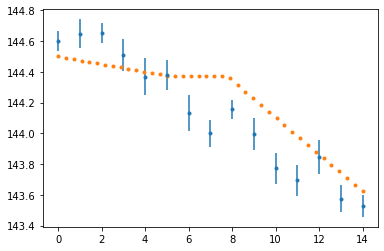

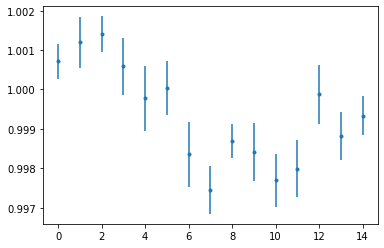

In [14]:
chain_files = sorted(glob.glob('epoch*det2*FPMA*chain.fits'))

epochs = []
line_cent = []
line_err = []
for file in chain_files:
    epoch_str = (file.split('_'))[0]
    epoch = float((epoch_str[5:]))
    
    epochs.append(epoch)
    
    chain = Table.read(file)

    df = chain.to_pandas()
    for entry in df:
        if 'LineE__1' != entry:
            continue


        q = corner.quantile(df[entry], [0.16, 0.5, 0.84])
        err = 0.5* ((q[1] - q[0]) + (q[2] - q[1]))
        
        line_cent.append(float(q[0]))
        line_err.append(float(err))

epochs = np.array(epochs)
td = np.linspace(0, np.max(epochs), 40)
p0 = [fpma_gain_shift['det2'], 7.0, 0.997]

plt.errorbar(epochs, line_cent, line_err, fmt='.')
#plt.plot(td, piecewise_linear(td, *p0 ), '.')

p , e = optimize.curve_fit(piecewise_linear, epochs, line_cent, sigma=line_err, p0 = p0,
                          bounds = ([p0[0]*0.9999, 5, 0.9],[p0[0], 10, 1.1]))

print('First guess: ', p0)
print('Fit: ', p)

plt.plot(td, piecewise_linear(td, *p), '.')

plt.show()

est_lines = piecewise_linear(epochs, *p)

plt.errorbar(epochs, line_cent / est_lines, line_err / est_lines, fmt = '.')


plt.show()



line_cent = []
line_err = []
for file in chain_files:
    
    chain = Table.read(file)
    df = chain.to_pandas()
    for entry in df:
        if 'LineE__4' != entry:
            continue


        q = corner.quantile(df[entry], [0.16, 0.5, 0.84])
        err = 0.5* ((q[1] - q[0]) + (q[2] - q[1]))
        
        line_cent.append(float(q[0]))
        line_err.append(float(err))


plt.errorbar(epochs, line_cent, line_err, fmt='.')
plt.plot(td, piecewise_linear(td, *p, en0=144.5 ), '.')




plt.show()

est_lines = piecewise_linear(epochs, *p, en0=144.5)

plt.errorbar(epochs, line_cent / est_lines, line_err / est_lines, fmt = '.')

plt.show()

First guess:  [0.9972, 7.0, 0.997]
Fit:  [0.9972     8.24699088 0.99369921]


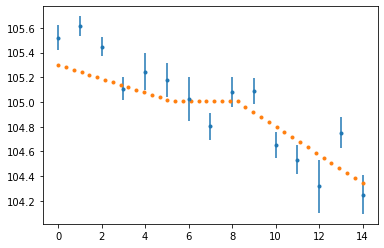

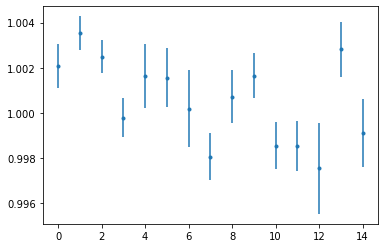

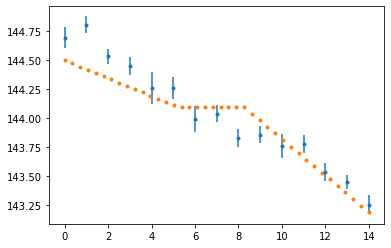

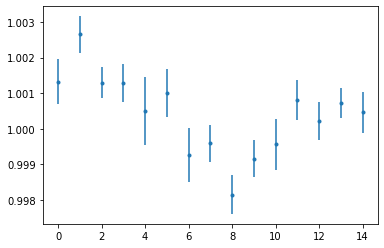

In [15]:
chain_files = sorted(glob.glob('epoch*det3*FPMA*chain.fits'))

epochs = []
line_cent = []
line_err = []
for file in chain_files:
    epoch_str = (file.split('_'))[0]
    epoch = float((epoch_str[5:]))
    
    epochs.append(epoch)
    
    chain = Table.read(file)

    df = chain.to_pandas()
    for entry in df:
        if 'LineE__1' != entry:
            continue


        q = corner.quantile(df[entry], [0.16, 0.5, 0.84])
        err = 0.5* ((q[1] - q[0]) + (q[2] - q[1]))
        
        line_cent.append(float(q[0]))
        line_err.append(float(err))

epochs = np.array(epochs)
td = np.linspace(0, np.max(epochs), 40)
p0 = [fpma_gain_shift['det3'], 7.0, 0.997]

plt.errorbar(epochs, line_cent, line_err, fmt='.')
#plt.plot(td, piecewise_linear(td, *p0 ), '.')

p , e = optimize.curve_fit(piecewise_linear, epochs, line_cent, sigma=line_err, p0 = p0,
                          bounds = ([p0[0]*0.9999, 5, 0.9],[p0[0], 10, 1.1]))

print('First guess: ', p0)
print('Fit: ', p)

plt.plot(td, piecewise_linear(td, *p), '.')

plt.show()

est_lines = piecewise_linear(epochs, *p)

plt.errorbar(epochs, line_cent / est_lines, line_err / est_lines, fmt = '.')


plt.show()



line_cent = []
line_err = []
for file in chain_files:
    
    chain = Table.read(file)
    df = chain.to_pandas()
    for entry in df:
        if 'LineE__4' != entry:
            continue


        q = corner.quantile(df[entry], [0.16, 0.5, 0.84])
        err = 0.5* ((q[1] - q[0]) + (q[2] - q[1]))
        
        line_cent.append(float(q[0]))
        line_err.append(float(err))


plt.errorbar(epochs, line_cent, line_err, fmt='.')
plt.plot(td, piecewise_linear(td, *p, en0=144.5 ), '.')




plt.show()

est_lines = piecewise_linear(epochs, *p, en0=144.5)

plt.errorbar(epochs, line_cent / est_lines, line_err / est_lines, fmt = '.')

plt.show()

First guess:  [0.9957, 7.0, 0.997]
Fit:  [0.9957     7.52466709 0.99771447]


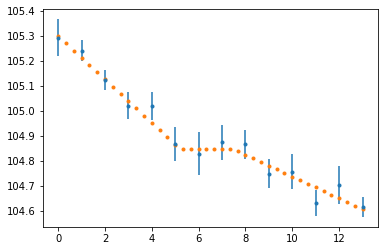

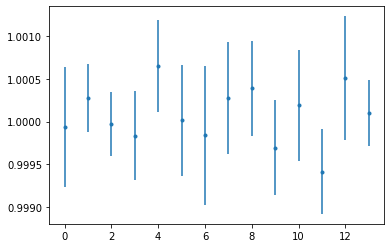

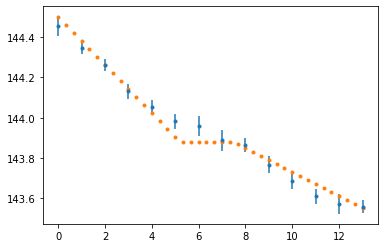

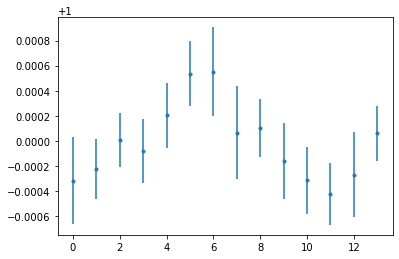

In [16]:
chain_files = sorted(glob.glob('epoch*det0*FPMB*chain.fits'))

epochs = []
line_cent = []
line_err = []
for file in chain_files:
    epoch_str = (file.split('_'))[0]
    epoch = float((epoch_str[5:]))
    
    epochs.append(epoch)
    
    chain = Table.read(file)

    df = chain.to_pandas()
    for entry in df:
        if 'LineE__1' != entry:
            continue


        q = corner.quantile(df[entry], [0.16, 0.5, 0.84])
        err = 0.5* ((q[1] - q[0]) + (q[2] - q[1]))
        
        line_cent.append(float(q[0]))
        line_err.append(float(err))

epochs = np.array(epochs)
td = np.linspace(0, np.max(epochs), 40)
p0 = [fpmb_gain_shift['det0'], 7.0, 0.997]

plt.errorbar(epochs, line_cent, line_err, fmt='.')
#plt.plot(td, piecewise_linear(td, *p0 ), '.')

p , e = optimize.curve_fit(piecewise_linear, epochs, line_cent, sigma=line_err, p0 = p0,
                          bounds = ([p0[0]*0.9999, 5, 0.9],[p0[0], 10, 1.1]))

print('First guess: ', p0)
print('Fit: ', p)

plt.plot(td, piecewise_linear(td, *p), '.')

plt.show()

est_lines = piecewise_linear(epochs, *p)

plt.errorbar(epochs, line_cent / est_lines, line_err / est_lines, fmt = '.')


plt.show()



line_cent = []
line_err = []
for file in chain_files:
    
    chain = Table.read(file)
    df = chain.to_pandas()
    for entry in df:
        if 'LineE__4' != entry:
            continue


        q = corner.quantile(df[entry], [0.16, 0.5, 0.84])
        err = 0.5* ((q[1] - q[0]) + (q[2] - q[1]))
        
        line_cent.append(float(q[0]))
        line_err.append(float(err))


plt.errorbar(epochs, line_cent, line_err, fmt='.')
plt.plot(td, piecewise_linear(td, *p, en0=144.5 ), '.')




plt.show()

est_lines = piecewise_linear(epochs, *p, en0=144.5)

plt.errorbar(epochs, line_cent / est_lines, line_err / est_lines, fmt = '.')

plt.show()

First guess:  [0.9932, 7.0, 0.997]
Fit:  [0.9932     7.2838227  0.99574398]


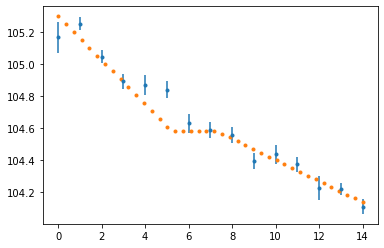

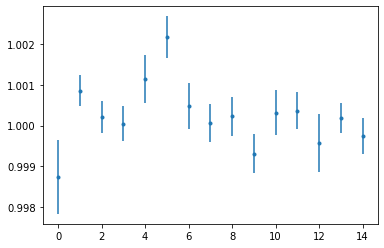

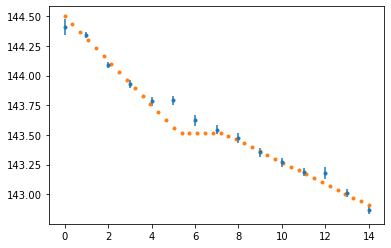

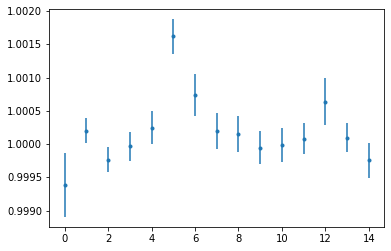

In [17]:
chain_files = sorted(glob.glob('epoch*det1*FPMB*chain.fits'))

epochs = []
line_cent = []
line_err = []
for file in chain_files:
    epoch_str = (file.split('_'))[0]
    epoch = float((epoch_str[5:]))
    
    epochs.append(epoch)
    
    chain = Table.read(file)

    df = chain.to_pandas()
    for entry in df:
        if 'LineE__1' != entry:
            continue


        q = corner.quantile(df[entry], [0.16, 0.5, 0.84])
        err = 0.5* ((q[1] - q[0]) + (q[2] - q[1]))
        
        line_cent.append(float(q[0]))
        line_err.append(float(err))

epochs = np.array(epochs)
td = np.linspace(0, np.max(epochs), 40)
p0 = [fpmb_gain_shift['det1'], 7.0, 0.997]

plt.errorbar(epochs, line_cent, line_err, fmt='.')
#plt.plot(td, piecewise_linear(td, *p0 ), '.')

p , e = optimize.curve_fit(piecewise_linear, epochs, line_cent, sigma=line_err, p0 = p0,
                          bounds = ([p0[0]*0.9999, 5, 0.9],[p0[0], 10, 1.1]))

print('First guess: ', p0)
print('Fit: ', p)

plt.plot(td, piecewise_linear(td, *p), '.')

plt.show()

est_lines = piecewise_linear(epochs, *p)

plt.errorbar(epochs, line_cent / est_lines, line_err / est_lines, fmt = '.')


plt.show()



line_cent = []
line_err = []
for file in chain_files:
    
    chain = Table.read(file)
    df = chain.to_pandas()
    for entry in df:
        if 'LineE__4' != entry:
            continue


        q = corner.quantile(df[entry], [0.16, 0.5, 0.84])
        err = 0.5* ((q[1] - q[0]) + (q[2] - q[1]))
        
        line_cent.append(float(q[0]))
        line_err.append(float(err))


plt.errorbar(epochs, line_cent, line_err, fmt='.')
plt.plot(td, piecewise_linear(td, *p, en0=144.5 ), '.')




plt.show()

est_lines = piecewise_linear(epochs, *p, en0=144.5)

plt.errorbar(epochs, line_cent / est_lines, line_err / est_lines, fmt = '.')

plt.show()

First guess:  [0.9928, 7.0, 0.997]
Fit:  [0.99270072 5.         0.99556198]


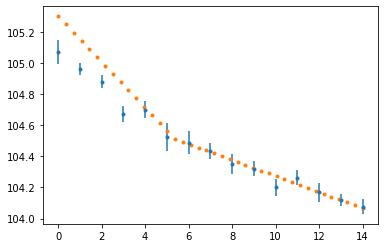

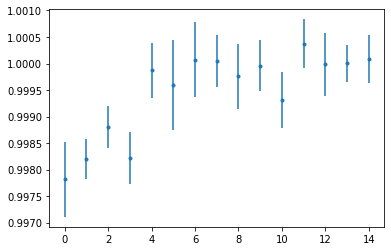

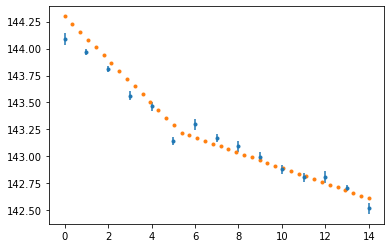

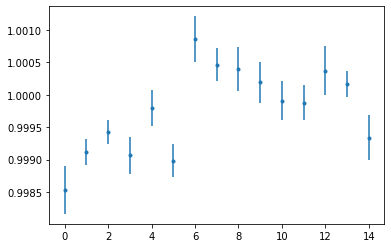

In [23]:
chain_files = sorted(glob.glob('epoch*det2*FPMB*chain.fits'))

epochs = []
line_cent = []
line_err = []
for file in chain_files:
    epoch_str = (file.split('_'))[0]
    epoch = float((epoch_str[5:]))
    
    epochs.append(epoch)
    
    chain = Table.read(file)

    df = chain.to_pandas()
    for entry in df:
        if 'LineE__1' != entry:
            continue


        q = corner.quantile(df[entry], [0.16, 0.5, 0.84])
        err = 0.5* ((q[1] - q[0]) + (q[2] - q[1]))
        
        line_cent.append(float(q[0]))
        line_err.append(float(err))

epochs = np.array(epochs)
td = np.linspace(0, np.max(epochs), 40)
p0 = [fpmb_gain_shift['det2'], 7.0, 0.997]

plt.errorbar(epochs, line_cent, line_err, fmt='.')
#plt.plot(td, piecewise_linear(td, *p0 ), '.')

p , e = optimize.curve_fit(piecewise_linear, epochs, line_cent, sigma=line_err, p0 = p0,
                          bounds = ([p0[0]*0.9999, 5, 0.9],[p0[0], 10, 1.1]))

print('First guess: ', p0)
print('Fit: ', p)

plt.plot(td, piecewise_linear(td, *p), '.')

plt.show()

est_lines = piecewise_linear(epochs, *p)

plt.errorbar(epochs, line_cent / est_lines, line_err / est_lines, fmt = '.')


plt.show()



line_cent = []
line_err = []
for file in chain_files:
    
    chain = Table.read(file)
    df = chain.to_pandas()
    for entry in df:
        if 'LineE__4' != entry:
            continue


        q = corner.quantile(df[entry], [0.16, 0.5, 0.84])
        err = 0.5* ((q[1] - q[0]) + (q[2] - q[1]))
        
        line_cent.append(float(q[0]))
        line_err.append(float(err))


plt.errorbar(epochs, line_cent, line_err, fmt='.')
plt.plot(td, piecewise_linear(td, *p, en0=144.3 ), '.')




plt.show()

est_lines = piecewise_linear(epochs, *p, en0=144.3)

plt.errorbar(epochs, line_cent / est_lines, line_err / est_lines, fmt = '.')

plt.show()